<a href="https://colab.research.google.com/github/MoonlightO2/Python-Web-Scraping---BBC-News-Dataset/blob/main/Python_Web_Scraping_BBC_News_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Web Scraping - BBC News Dataset**
Date: 2023-12-10

https://www.bbc.co.uk/,
https://www.bbc.co.uk/news,
https://www.bbc.co.uk/news/uk,
https://www.bbc.co.uk/news/england,
https://www.bbc.co.uk/news/scotland,
https://www.bbc.co.uk/news/wales,
https://www.bbc.co.uk/news/northern_ireland,
https://www.bbc.co.uk/naidheachdan,
https://www.bbc.co.uk/cymrufyw,
https://www.bbc.co.uk/news/world/europe/isle_of_man,
https://www.bbc.co.uk/news/world/europe/guernsey,
https://www.bbc.co.uk/news/world/europe/jersey,
https://www.bbc.co.uk/news/localnews,
https://www.bbc.co.uk/news/business,
https://www.bbc.co.uk/news/politics,
https://www.bbc.co.uk/news/entertainment_and_arts,
https://www.bbc.co.uk/news/technology,
https://www.bbc.co.uk/news/science_and_environment,
https://www.bbc.co.uk/news/health,
https://www.bbc.co.uk/news/education,
https://www.bbc.co.uk/news/topics/c2vdnvdg6xxt,
https://www.bbc.co.uk/news/topics/cljev4jz3pjt,
https://www.bbc.co.uk/news/topics/c1vw6q14rzqt,
https://www.bbc.co.uk/news/topics/cmj34zmwm1zt

In [86]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import csv
from urllib.parse import urlparse, quote

In [91]:
def clean_dataset_name(netloc):
    # Replace "www.", ".co.uk", and "/" with underscores
    cleaned_name = netloc.replace("www.", "").replace(".co.uk", "").replace("/", "_")
    return cleaned_name

def generate_dataset_name(url):
    # Parse the URL
    parsed_url = urlparse(url)

    # Extract path components
    path_components = [component for component in parsed_url.path.split("/") if component]

    # Create a dataset name based on path components
    dataset_name = "_".join(["dataset"] + path_components)
    return dataset_name

def scrape_bbc_news(url):
    # Send an HTTP request to the website
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Identify the HTML elements containing the news articles
    article_elements = soup.find_all("div", class_="gs-c-promo-body")

    # Extract the name from the URL
    url_parsed = urlparse(url)
    dataset_name = clean_dataset_name(url_parsed.netloc)
    custom_dataset_name = generate_dataset_name(url)

    # Create a CSV file and write headers
    csv_filename = f"{quote(custom_dataset_name)}.csv"
    with open(csv_filename, mode="w", encoding="utf-8", newline="") as csv_file:
        fieldnames = ["Headline", "Content"]
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()

        # Extract and write headlines and content to CSV
        for article in article_elements:
            headline_element = article.find("h3", class_="gs-c-promo-heading__title")
            content_element = article.find("p", class_="gs-c-promo-summary")

            # Check if both headline and content elements are found
            if headline_element and content_element:
                headline = headline_element.text.strip()
                content = content_element.text.strip()
                writer.writerow({"Headline": headline, "Content": content})

    print(f"News Dataset Created: {csv_filename}")

In [104]:
if __name__ == "__main__":
  news_url = input("Enter the news website URL: ")
  scrape_bbc_news(news_url)

Enter the news website URL: https://www.bbc.co.uk/news/disability
News Dataset Created: dataset_news_disability.csv


In [105]:
# Set the working directory to the folder containing the CSV files
csv_folder_path = "/content"  # Update with the actual folder path

# List all files in the folder
files = os.listdir(csv_folder_path)

# Filter files to include only CSV files
csv_files = [file for file in files if file.endswith(".csv")]

# Print the dataset names from the CSV files
for csv_file in csv_files:
    dataset_name = os.path.splitext(csv_file)[0]  # Extracting the dataset name without extension
    print(f"Dataset Name: {dataset_name}")

Dataset Name: dataset_news_topics_cljev4jz3pjt
Dataset Name: dataset_news_topics_c1vw6q14rzqt
Dataset Name: dataset_news_health
Dataset Name: dataset_bbc_news_uk
Dataset Name: dataset_news_politics
Dataset Name: dataset_bbc_news_wal
Dataset Name: dataset_news_entertainment_and_arts
Dataset Name: dataset_news_education
Dataset Name: dataset_news_business
Dataset Name: dataset_news_technology
Dataset Name: dataset_bbc_news
Dataset Name: dataset_news_topics_c2vdnvdg6xxt
Dataset Name: dataset_news_science_and_environment
Dataset Name: dataset_bbc_news_eng
Dataset Name: dataset_bbc_news_jer
Dataset Name: dataset_bbc_news_sco
Dataset Name: dataset_bbcnews
Dataset Name: dataset_bbc_news_nai
Dataset Name: dataset_news_disability
Dataset Name: dataset_bbc_news_gue
Dataset Name: dataset_news
Dataset Name: dataset_bbc_news_local
Dataset Name: dataset_bbc_news_cym
Dataset Name: dataset_bbc_news_nire
Dataset Name: dataset_bbc_news_iom
Dataset Name: dataset_news_topics_cmj34zmwm1zt


In [106]:
# Set the working directory to the folder containing the CSV files
csv_folder_path = "/content"  # Update with the actual folder path

# List all files in the folder
files = os.listdir(csv_folder_path)

# Filter files to include only CSV files
csv_files = [file for file in files if file.endswith(".csv")]

# Initialize an empty list to store individual DataFrames
dataframes = []

# Read each CSV file and append its DataFrame to the list
for csv_file in csv_files:
    file_path = os.path.join(csv_folder_path, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
dataset_bbcnews = pd.concat(dataframes, ignore_index=True)

# Optionally, you can export the concatenated DataFrame to a new CSV file
dataset_bbcnews.to_csv("/content/dataset_bbcnews.csv", index=False)

In [107]:
# Print the concatenated DataFrame
print("Concatenated DataFrame:")
dataset_bbcnews.head()

Concatenated DataFrame:


,Headline,Content
0,Murder investigation launched after baby's death,Police are called to a property in Ipswich and...
1,Murder investigation launched after baby's death,Police are called to a property in Ipswich and...
2,Warning of growing gap between haves and have-...,Issues including stagnant wages and mental hea...
3,Royal Family reveal Christmas card pictures,Prince and Princess of Wales use a monochrome ...
4,Two dead after crash involving police vehicle,A man in his 60s and a woman in her 50s died a...


In [108]:
dataset_bbcnews.shape

(724, 2)

In [109]:
# Remove duplicates based on all columns
dataset_bbcnews = dataset_bbcnews.drop_duplicates()

In [114]:
dataset_bbcnews.shape

(72, 2)

In [111]:
dataset_bbcnews

,Headline,Content
0,Murder investigation launched after baby's death,Police are called to a property in Ipswich and...
2,Warning of growing gap between haves and have-...,Issues including stagnant wages and mental hea...
3,Royal Family reveal Christmas card pictures,Prince and Princess of Wales use a monochrome ...
4,Two dead after crash involving police vehicle,A man in his 60s and a woman in her 50s died a...
5,Tory splits and spats put Sunak under pressure,The PM's unique selling point - ending the cha...
...,...,...
659,"'When everybody can game, everyone wins'",Accessibility in gaming is a hot topic - but t...
660,TV boss in hospital after bullying allegations,The husband of Sian Doyle says a report into b...
661,'Massive steps back' for Paralympic sport,Paralympic champion racer Hannah Cockroft talk...
662,Sony debuts PS5 controller for disabled gamers,The Access Controller is a 'highly customisabl...


In [115]:
num_rows = len(dataset_bbcnews)

# Print the result
print(f'The number of rows in the dataset is: {num_rows}')

The number of rows in the dataset is: 72


In [118]:
# Specify the file name
file_name = "BBC News - 2023-12-10.csv"

# Writing to the CSV file
dataset_bbcnews.to_csv(file_name, index=False, encoding='utf-8')

print(f"The dataset has been successfully written to {file_name}.")

The dataset has been successfully written to BBC News - 2023-12-10.csv.


## **Create a Word Cloud using Dataset**

### **Load dataset**

In [119]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [123]:
# Load your dataset
df = pd.read_csv('BBC News - 2023-12-10.csv')

# Assuming your text is in a column named 'text'
text_data = df['Content'].astype(str)

### **Preprocess the text data (optional)**

In [124]:
# Remove stopwords and tokenize
stop_words = set(stopwords.words('english'))
text_data = text_data.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

### **Create the word cloud**

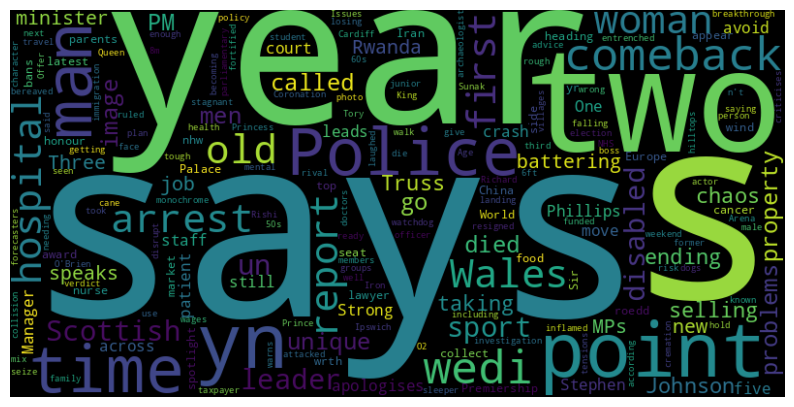

In [127]:
# Concatenate all text data into a single string
all_text = ' '.join(text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **News Dataset - Things to do**
With a news dataset containing 677 records, there are numerous analyses and tasks you can perform, depending on the content and structure of the data. Here are some ideas:

1. **Text Analysis:**
   - **Word Frequency Analysis:** Identify the most frequent words and terms in the news articles.
   - **Sentiment Analysis:** Determine the sentiment (positive, negative, neutral) of each article.
   - **Topic Modeling:** Use techniques like Latent Dirichlet Allocation (LDA) to discover topics within the dataset.

2. **Time Series Analysis:**
   - **Temporal Trends:** Analyze how news coverage has evolved over time. Identify patterns, spikes, or recurring themes.

3. **Geospatial Analysis:**
   - **Geographic Trends:** If your dataset includes location information, analyze news trends based on geographical regions.
   - **Mapping:** Create visualizations of news coverage on a map.

4. **Categorization and Classification:**
   - **Topic Categorization:** Categorize news articles into topics or themes.
   - **Fake News Detection:** If applicable, build a model to identify potentially misleading or fake news.

5. **Entity Recognition:**
   - **Named Entity Recognition (NER):** Extract entities such as people, organizations, locations, and more from the news articles.

6. **Network Analysis:**
   - **Authorship Network:** Explore connections between different authors or contributors.
   - **Co-occurrence Analysis:** Identify relationships between entities mentioned in the articles.

7. **User Engagement Analysis:**
   - **Popularity Analysis:** Analyze which articles or topics are more popular based on metrics like views, comments, or shares.
   - **Social Media Impact:** If available, analyze the impact of news articles on social media platforms.

8. **Content Recommendation:**
   - **Recommendation System:** Build a recommendation system to suggest related articles based on user preferences or content similarity.

9. **Language Processing:**
   - **Language Translation:** If the dataset contains articles in multiple languages, you can explore translation services or analyze language-specific patterns.

10. **Data Visualization:**
    - **Word Clouds:** Create word clouds to visually represent the most common words.
    - **Graphs and Charts:** Use bar charts, line charts, or other visualizations to represent trends or comparisons.

11. **Predictive Modeling:**
    - **Prediction of Trends:** Use machine learning models to predict future trends in news coverage based on historical data.

Remember to thoroughly clean and preprocess your data before conducting analyses, and tailor your approach based on the specific goals and characteristics of your news dataset. Each of the above tasks can provide valuable insights into the dataset and help you uncover patterns and trends within the news articles.

### **1. Text Analysis - Word Frequency Analysis:**
Identify the most frequent words and terms in the news articles.

In [128]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
def word_frequency_analysis(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (common words that usually don't carry much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Calculate word frequencies
    freq_dist = FreqDist(words)

    return freq_dist

def plot_word_frequency(freq_dist, num_words=10):
    # Plot the most common words
    freq_dist.plot(num_words, cumulative=False)
    plt.show()

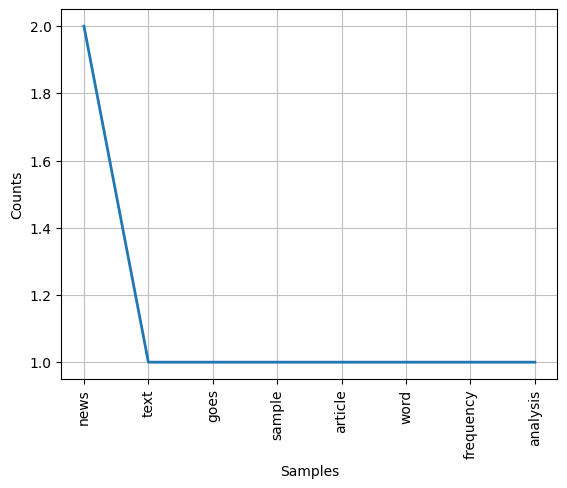

In [130]:
if __name__ == "__main__":
    # Replace 'your_news_text_here' with the actual news text or load it from a file
    news_text = """
    Your news text goes here. This is a sample news article for word frequency analysis.
    """

    # Perform word frequency analysis
    frequency_distribution = word_frequency_analysis(news_text)

    # Plot the word frequency distribution
    plot_word_frequency(frequency_distribution)